# Урок 3. Задания.

In [36]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Задание 1
Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'. 
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [1]:
names =  'Name1 Surname1, Name2 Surname2'

In [4]:
names_list = names.split(', ')

In [5]:
names_list

['Name1 Surname1', 'Name2 Surname2']

### Задание 2
В переменной df содержатся данные следующего вида:

Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35. Поместите результат в переменную medium_35.



In [6]:
# medium_35 = df.query("wealth == 'medium' and age > 35")

### Задание 3
Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:

Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

Note: колонка называется 'Клиент id' - шрифт плохо передаёт кейс i в id

In [ ]:
# df = df.rename(columns = {'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'})

### Задание 4
Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться информация о том, старше ли клиент 30 лет или нет (булево значение).

In [ ]:
# df['older_than_30'] = df.age > 30

### Задание 5
А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [ ]:
# unique_num = df.nunique()

### Задание 6
У нас появились новые данные! Переменная data хранит в себе датафрейм следующего вида:

Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно).

Предыдущий датафрейм загружен в переменную df, новый – в data 

In [ ]:
# full_data = data.merge(df, on = 'client_id')

### Задание 7
А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

принимает на вход один параметр – путь к файлу
считывает переданный файл, в котором разделителем является ;
считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят вот так, скачать можно отсюда.



P.S. Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно.

In [13]:
def read_n_agg(link):
    file = pd.read_csv(link, sep = ';')
    return file.groupby('company') \
                .agg({'income': 'mean'})

In [14]:
read_n_agg('https://stepik.org/media/attachments/lesson/359209/companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


### Задание 8
Вернёмся к данным о поездках на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!

journey_id – уникальный id поездки

user_id – id пользователя

driver_id – id водителя

taxi_id – id машины

icon – тип поездки

start_type – тип заказа (asap, reserved, delayed)

start_at – время начала поездки

start_lat – исходное местоположение пользователя, широта

start_lon – исходное местоположение пользователя, долгота

end_at – время окончания поездки

end_lat – итоговое местоположение, широта

end_lon – итоговое местоположение, долгота

end_state – состояние заказа

driver_start_lat – исходное местоположение водителя, широта

driver_start_lon – исходное местоположение водителя, долгота

arrived_at – время прибытия водителя

source – платформа, с которой сделан заказ

driver_score – оценка водителя клиентом

rider_score – оценка клиента водителем


Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

In [15]:
import pandas as pd
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', parse_dates = ['start_at', 'end_at', 'arrived_at'], sep = ';')

In [17]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


### Задание 9
Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [29]:
source_orders_count = taxi.groupby('source', as_index = False) \
                            .agg({'user_id': 'count'}) \
                            .sort_values('user_id', ascending = False) \
                            .rename(columns = {'user_id': 'orders_count'})

In [31]:
source_orders_count

,source,orders_count
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [33]:
iphone_orders_procent = round((source_orders_count.orders_count.head(1) / taxi.shape[0]) * 100, 0)

In [35]:
iphone_orders_procent

3    42.0
Name: orders_count, dtype: float64

Наибольшее число заказов сделано с платформы iPhone и составляет 42% от общего количества

### Задание 10
Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).

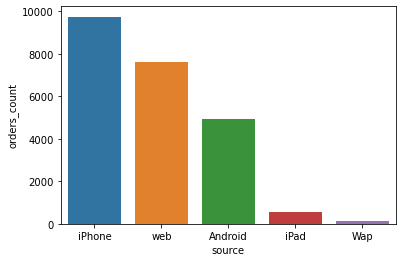

In [37]:
ax = sns.barplot(x = 'source', y = 'orders_count', data = source_orders_count)

### Задание 11
Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.

sns.countplot(taxi['source'])

Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

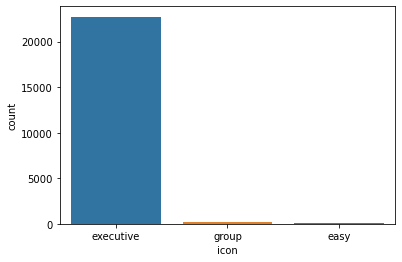

In [40]:
sns.countplot(taxi['icon'])

### Задание 12
С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.

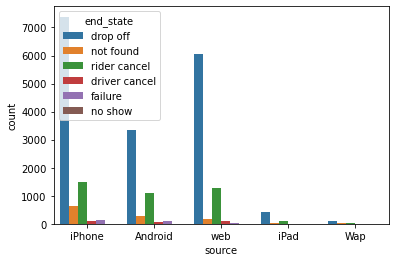

In [41]:
ax = sns.countplot(x = "source", hue = 'end_state', data = taxi)

Можно сделать некоторые наблюдения:

Больше всего заказов со статусом drop off совершено с платформы iPhone

На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone

Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone

### Задание 13
Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:


1) Посчитайте частоту встречаемости каждой из оценок

2) Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))

3) Сбросьте индексы

4) Переименуйте колонки в driver_score и percentage

5) Отсортируйте по driver_score в порядке возрастания (от 0 до 5)

6) Запишите результат в driver_score_counts


Полезные функции:

.mul() – умножение, более удобный вариант для использования в цепочке методов 

.round() – округление

.reset_index() – сбросить индекс

.value_counts() – сколько раз встречается каждое значение переменной

In [57]:
driver_score_counts = (taxi.driver_score 
                .value_counts(normalize = True) # частота встречаемости каждой оценки
                .mul(100) # перевод в проценты
                .round(2) # округление до 2 знаков
                .reset_index() # сбрасываем индекс
                .rename(columns = {'index': 'driver_score', 'driver_score': 'percentage'}) # переименование колонок
                .sort_values('driver_score') # сортировка по возрастанию
)

In [59]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


### Задание 14
Теперь строим график
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)

ax.set(xlabel='Driver score', ylabel='Percentage')

sns.despine()  # убрать часть рамки графика

plt.show()

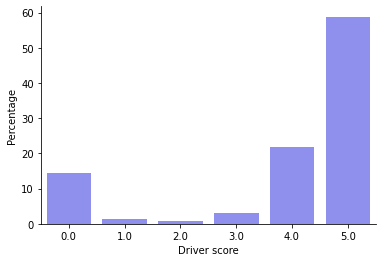

In [63]:
ax = sns.barplot(x = 'driver_score', y = 'percentage', data = driver_score_counts, color = 'blue', alpha = 0.5)
ax.set(xlabel = 'Driver score', ylabel = 'Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

### Задание 15
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [68]:
rider_score_counts = (taxi.rider_score 
                .value_counts(normalize = True) # частота встречаемости каждой оценки
                .mul(100) # перевод в проценты
                .round(2) # округление до 2 знаков
                .reset_index() # сбрасываем индекс
                .rename(columns = {'index': 'rider_score', 'rider_score': 'percentage'}) # переименование колонок
                .sort_values('rider_score') # сортировка по возрастанию
)

In [70]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


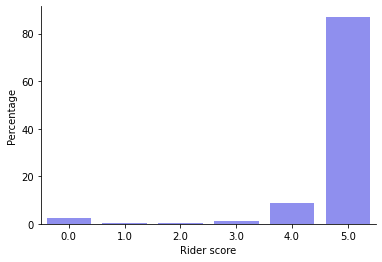

In [75]:
ax = sns.barplot(x = 'rider_score', y = 'percentage', data = rider_score_counts, color = 'blue', alpha = 0.5)
ax.set(xlabel = 'Rider score', ylabel = 'Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Можно сделать некоторые наблюдения:

Более чем в 80% случаев водители поставили клиентам 5 звездочек

Водители ставят меньше 0, чем клиенты
